# Filtering

Before we start with segmentation, we will filter the TTS data so that we are including primarily post-secondary students. Previously, we've exaplained the removal of rows with unknown mode choice or with school bus as the mode choice.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../Data/TTS_2016_Students.csv')
df = df[df['TripToSchoolTime'] > 0] # Remove 7616 rows with unknown mode choice and trip times
df = df[df['ModeTakenToSchool'] != 'S'] # Remove 440 rows with school bus mode choice
df

,HomeZone,SchoolZone,SchoolCode,Age,Sex,License,Occupation,EmploymentStatus,StudentStatus,Vehicles,IncomeClass,Adults,Children,ExpansionFactor,ModeTakenToSchool,TripToSchoolTime
0,133,134,2621,17,M,N,O,O,S,1,2,3,2,35.92,B,800
1,264,25,9244,19,M,N,O,O,S,2,3,5,0,42.03,B,1300
2,38,25,9243,22,M,Y,S,P,S,0,3,2,0,21.01,W,1000
3,1039,25,9244,26,M,Y,O,O,S,3,7,5,1,16.17,D,700
4,613,25,9244,19,M,Y,O,O,S,1,2,4,0,44.06,B,645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19844,3614,4065,731,73,F,Y,O,O,P,2,5,2,0,15.03,D,815
19846,2384,2387,4610,17,F,N,O,O,S,2,6,3,1,41.14,P,825
19851,1315,1318,3445,17,M,Y,O,O,S,7,7,3,1,38.07,P,730
19853,2445,2387,4610,17,F,Y,O,O,S,2,7,4,1,40.42,P,745


We previously noticed that even after those removals, the number of 17-year-olds in the sample is still disproportionately high. That suggested that our sample contained many high-school students in addition to post-secondary students.

To try to filter out more of these students from our sample without removing post-secondary students, we remove students whose school zone attracts primarily 17-year-olds, as these zones are highly unlikely to contain post-secondary institutions.

In [2]:
# Filter out zones with over 50% seventeen-year-old
low_17_zones = []
for zone in set(df['SchoolZone']):
    temp = df[df['SchoolZone'] == zone]
    if (temp['Age'] == 17).sum() / len(temp['Age']) < 0.5:
        low_17_zones.append(zone)
df = df[df['SchoolZone'].isin(low_17_zones)]

As we can see, 1669 rows have been removed. This supports our prediction that many of the 17-year-olds included in the sample do not attend post-secondary institutions. Let us now check the updated age distribution.

20    1161
19    1160
18    1092
21    1004
22     792
      ... 
83       2
76       2
81       1
74       1
79       1
Name: Age, Length: 66, dtype: int64

count    9130.000000
mean       24.621468
std         9.049394
min        17.000000
25%        19.000000
50%        21.000000
75%        26.000000
max        83.000000
Name: Age, dtype: float64


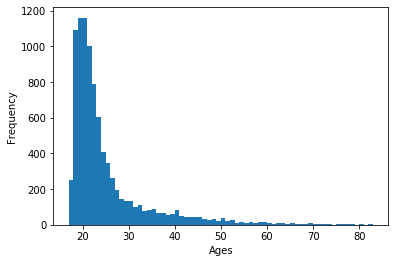

In [3]:
print(df['Age'].value_counts())
print()
print(df['Age'].describe())

numBins = 66
plt.figure()
df['Age'].plot.hist(bins=numBins)
plt.xlabel('Ages')
plt.show()

As we can see, the updated age distribution seems much more reasonable, with fewer 17-year-olds relative to 18-, 19-, and 20-year-olds.

Now, let's export the filtered dataset into a new CSV file.

In [4]:
df.to_csv(r'../Data/TTS_2016_Filtered.csv', index=False)